In [1]:
#Install Required Libraries
!pip install kagglehub[pandas-datasets] nltk seaborn matplotlib --quiet

In [3]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [7]:
df=pd.read_csv(r'C:\Users\venkata sai kapa\Downloads\jira_dataset.csv')

In [ ]:
# Exploratory Data Analysis

In [9]:
df.head()

,clean_summary,issue_type,status,project_name,project_type,project_lead,project_description,priority,resolution,task_assignee,task_deadline,text_length,cleaned_Task Description,cleaned_User Comments
0,implement task dashboard,bug,progress,backendapi,software,jatin raj,internal devops automation tool,low,done,brian kim,tow days,24,default task description,default task description
1,add dark mode feature,task,done,web portal,software,jatin raj,building ai model task sorting,medium,done,shraddha,five days,21,default task description,default task description
2,design splash screen,bug,review,mobileapp,software,pooja agarwal,portal customer access,low,progress,alice johnson,tow days,20,default task description,default task description
3,design splash screen,story,done,aiengine,software,pooja agarwal,building ai model task sorting,critical,progress,pooja agarwal,for days,20,default task description,default task description
4,revamp login ui,bug,review,devopstooling,software,pooja agarwal,building ai model task sorting,critical,progress,alice johnson,one days,15,default task description,default task description


In [11]:
# Check structure and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   clean_summary             1233 non-null   object
 1   issue_type                1233 non-null   object
 2   status                    928 non-null    object
 3   project_name              1233 non-null   object
 4   project_type              1233 non-null   object
 5   project_lead              1233 non-null   object
 6   project_description       1233 non-null   object
 7   priority                  1233 non-null   object
 8   resolution                1233 non-null   object
 9   task_assignee             1233 non-null   object
 10  task_deadline             1233 non-null   object
 11  text_length               1233 non-null   int64 
 12  cleaned_Task Description  1232 non-null   object
 13  cleaned_User Comments     1232 non-null   object
dtypes: int64(1), object(13)


In [13]:
df.isnull().sum()

clean_summary                 0
issue_type                    0
status                      305
project_name                  0
project_type                  0
project_lead                  0
project_description           0
priority                      0
resolution                    0
task_assignee                 0
task_deadline                 0
text_length                   0
cleaned_Task Description      1
cleaned_User Comments         1
dtype: int64

In [23]:
#Drop missing and duplicate values
df.drop_duplicates(inplace=True)

In [47]:
# Plot: Task Complexity
print(df.columns)

Index(['clean_summary', 'issue_type', 'status', 'project_name', 'project_type',
       'project_lead', 'project_description', 'priority', 'resolution',
       'task_assignee', 'task_deadline', 'text_length',
       'cleaned_Task Description', 'cleaned_User Comments'],
      dtype='object')


df.columns = df.columns.str.strip()

In [51]:
column_data = df.get('corrected_column_Nmae')
if column_data is not None:
    sns.histplot(column_data, bins = 10, kde=True)
    plt.title("Task Complexity")
plt.show()

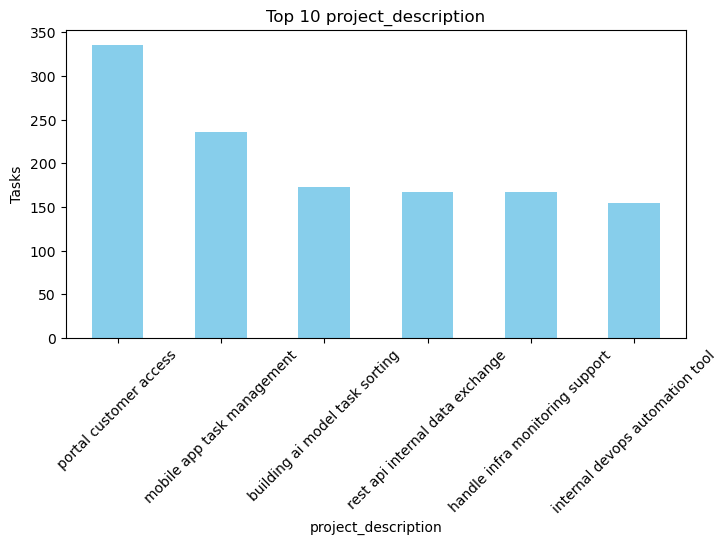

In [57]:
df['project_description'].value_counts().head(10).plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Top 10 project_description")
plt.ylabel("Tasks")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#NLP Preprocessing on task description

In [59]:
print(df.columns)

Index(['clean_summary', 'issue_type', 'status', 'project_name', 'project_type',
       'project_lead', 'project_description', 'priority', 'resolution',
       'task_assignee', 'task_deadline', 'text_length',
       'cleaned_Task Description', 'cleaned_User Comments'],
      dtype='object')


In [65]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):

    if not isinstance(text, str) or pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [67]:

# Use 'Project Description' instead of 'task_description'
df['cleaned_description'] = df['project_description'].apply(preprocess_text)


In [69]:
# Preview cleaned data - update column name here as well
df[['project_description', 'cleaned_description']].head()

,project_description,cleaned_description
0,internal devops automation tool,intern devop autom tool
1,building ai model task sorting,build ai model task sort
2,portal customer access,portal custom access
3,building ai model task sorting,build ai model task sort
4,building ai model task sorting,build ai model task sort


In [73]:
df.to_csv(r'C:\Users\venkata sai kapa\Downloads\jira_dataset.csv', index=False)
print("✅ Cleaned dataset saved as 'cleaned_tasks.csv'")

✅ Cleaned dataset saved as 'cleaned_tasks.csv'


In [89]:
from IPython.display import FileLink
FileLink(r'C:\Users\venkata sai kapa\Downloads\jira_dataset.csv')  # Creates a download link

C:\Users\venkata sai kapa\Downloads\jira_dataset.csv